Zach's EDA Jupyter Notebook

Access database, find all tables

In [2]:
import pandas as pd
import numpy as np
import oracledb
import logging
from geopy.geocoders import Nominatim
from pathlib import Path

from pathlib import Path
from IPython import get_ipython
current_file = Path(get_ipython().run_line_magic('pwd', '')).resolve()


#Connect to database
password = 'aybM6CFL9gykHEKn'
wallet_password = 'phbUHx6CMjxQj75A'

connect:str = input("Connect to the database y/n: \n")
if connect.lower() == 'y':
    connection = oracledb.connect(
        user="admin",
        password=password,
        dsn = "ltl3y0m4d7of29l1_high",
        config_dir=(str(current_file.parent / 'config')),
        wallet_location=(str(current_file.parent / 'config')),
        wallet_password=wallet_password)

    logging.info("Successfully connected to Oracle Database")
    cursor = connection.cursor()
else:
    print("Didn't connect to the database")

In [4]:
cursor.execute("SELECT table_name FROM user_tables")
table_names = [row[0] for row in cursor.fetchall()]
print(f"Tables in the database: {table_names}")

Tables in the database: ['CENSUS', 'HISTORIC_REAL_ESTATE', 'CALLS', 'TEST_TABLE', 'HISTORIC_CRIME', 'CRIME', 'CALLS_DUP']


Calls section

In [29]:
import pandas as pd
calls = pd.read_sql("Select * from Calls", connection)
calls.head()
#TODO: Add GEOID to calls, check if we started using the 

C:\Users\zfara\AppData\Local\Temp\ipykernel_11864\2359938824.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  calls = pd.read_sql("Select * from Calls", connection)


,CALL_NUMBER,DATE_TIME,LOCATION,POLICE_DISTRICT,NATURE_OF_CALL,STATUS,LATITUDE,LONGITUDE,GEOID
0,230311239,01/31/2023 04:42:12 PM,"N 35TH ST / W PARK HILL AV,MKE",3,ACC PI,Service in Progress,43.085368,-87.957141,None
1,230311241,01/31/2023 04:42:05 PM,"2222 S 37TH ST,MKE",2,INVESTIGATION,Assignment Completed,43.004218,-87.960256,None
2,230311230,01/31/2023 04:39:09 PM,"212 W WISCONSIN AV,MKE",1,SUSP PERS/AUTO,Unable to Locate Complainant,43.039249,-87.913401,None
3,230311236,01/31/2023 04:38:12 PM,"4204 W CAPITOL DR,MKE",7,TRAFFIC STOP,Advised,43.089974,-87.965580,None
4,230311235,01/31/2023 04:36:54 PM,"N TEUTONIA AV / W VILLARD AV,MKE",7,INVESTIGATION,Assignment Completed,43.071124,-87.930350,None


In [49]:
from datetime import datetime
datetime.strptime(calls.DATE_TIME[0], '%m/%d/%Y %I:%M:%S %p')
calls['datetime_column'] = calls.DATE_TIME.apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

<AxesSubplot: xlabel='datetime_column', ylabel='Count'>

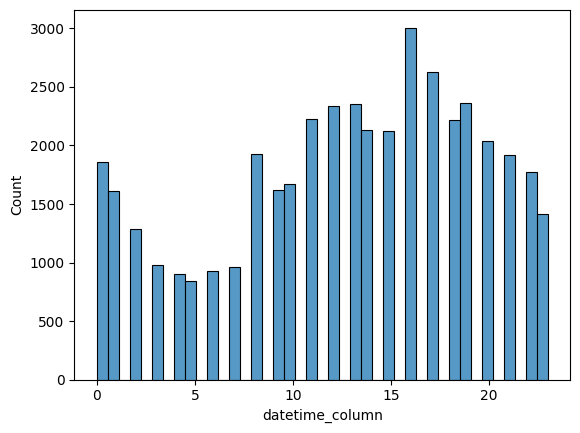

In [51]:
import seaborn as sns 
sns.histplot(calls.datetime_column.apply(lambda x: x.hour))

In [82]:
import matplotlib.pyplot as plt
top_10_natures = calls.NATURE_OF_CALL.value_counts()[0:10].index
#t10_natures_df = calls.NATURE_OF_CALL[calls.NATURE_OF_CALL.isin(top_10_natures)]
#sns.histplot(t10_natures_df)
## Disable the x-axis
#plt.setp(plt.gca().get_xticklabels(), visible=False);
print(top_10_natures)

Index(['RETURN STATION', 'TRAFFIC STOP', 'TRBL W/SUBJ', 'BUSINESS CHECK',
       'WELFARE CITIZEN', 'SPECIAL ASSIGN', 'FOLLOW UP', 'PATROL',
       'SHOTSPOTTER', 'ACC PDO'],
      dtype='object')


Census section

In [21]:
census = pd.read_sql("Select * from census", connection)
census.head()

C:\Users\zfara\AppData\Local\Temp\ipykernel_11864\132772818.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  census = pd.read_sql("Select * from census", connection)


,TRACT,GEOID,GEOMETRY,ESTIMATED_POP,MALE_POP,FEMALE_POP,MEDIAN_AGE,MEDIAN_INCOME,WHITE_POP,BLACK_POP,NATIVE_POP,HISPANIC_POP,INCOME_POV_LVL
0,008700,55079008700,POLYGON ((-65371.33323294844 4791454.558569728...,890.0,403.0,487.0,32.9,13782.0,0.0,890.0,0.0,890.0,890.0
1,008800,55079008800,POLYGON ((-65976.74531288422 4791487.360095243...,1620.0,795.0,825.0,32.5,16713.0,90.0,1498.0,4.0,1620.0,1620.0
2,008500,55079008500,POLYGON ((-64585.292365803034 4791763.78518607...,1540.0,756.0,784.0,29.5,19546.0,6.0,1517.0,17.0,1540.0,1540.0
3,009200,55079009200,POLYGON ((-68392.08530371182 4790901.985810455...,1630.0,807.0,823.0,30.7,23385.0,537.0,759.0,8.0,1630.0,1602.0
4,008900,55079008900,POLYGON ((-66590.0980055522 4791541.1265165135...,1548.0,724.0,824.0,21.4,12663.0,95.0,1268.0,0.0,1548.0,1444.0


Real estate section

In [22]:
real_estate = pd.read_sql("Select * from historic_real_estate", connection)
real_estate.head()
#TODO: Add GEOID to real estate

C:\Users\zfara\AppData\Local\Temp\ipykernel_11864\4161431809.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  real_estate = pd.read_sql("Select * from historic_real_estate", connection)


,PROPTYPE,ADDRESS,SALE_DATE,SALE_PRICE,LATITUDE,LONGITUDE
0,Residential,6261 N JOYCE AV,2012-05,80000,43.131774,-88.017959
1,Residential,5227 N 60TH ST,2012-05,104000,43.112705,-87.986525
2,Residential,1725 N MARSHALL ST,2012-05,87000,43.053582,-87.901090
3,Residential,2940 N CAMBRIDGE AV,2012-05,229500,43.072010,-87.891307
4,Residential,2228 E NEWBERRY BL,2012-05,640000,43.069707,-87.882044


Historic crime section

In [23]:
hist_crime = pd.read_sql("Select * from historic_crime", connection)
hist_crime.head()

C:\Users\zfara\AppData\Local\Temp\ipykernel_11864\2741180405.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hist_crime = pd.read_sql("Select * from historic_crime", connection)


,CALL_NUMBER,DATE_TIME,REPORTED_YEAR,REPORTED_MONTH,ADDRESS,WEAPON_USED,ALD,NSP,DISTRIC,TRACT,...,ARSON,ASSAULTOFFENSE,BURGLARY,CRIMINALDAMAGE,HOMICIDE,LOCKEDVEHICLE,ROBBERY,SEXOFFENSE,THEFT,VEHICLETHEFT
0,050020025,2005-01-02 17:03:00,2005,1,2424 N FRATNEY ST,None,3.0,7.0,5.0,10700.0,...,0,0,0,1,0,0,0,0,0,0
1,050020026,2005-01-02 15:15:00,2005,1,2122 S LAYTON BL,None,8.0,17.0,2.0,17300.0,...,0,0,0,0,0,0,0,0,1,0
2,050020027,2005-01-02 18:01:00,2005,1,2640 S 30TH ST,None,8.0,NaN,2.0,18900.0,...,0,0,0,1,0,0,0,0,0,0
3,050020028,2005-01-02 17:48:00,2005,1,3163 N FRATNEY ST,None,3.0,NaN,5.0,7100.0,...,0,0,0,1,0,0,0,0,0,0
4,050020029,2005-01-02 11:30:00,2005,1,8129 W BENDER AV,None,2.0,2.0,4.0,1400.0,...,0,0,0,0,0,0,0,0,0,1


Crime section

In [24]:
crime = pd.read_sql("Select * from crime", connection)
crime.head()

C:\Users\zfara\AppData\Local\Temp\ipykernel_11864\2187178922.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  crime = pd.read_sql("Select * from crime", connection)


,CALL_NUMBER,DATE_TIME,ADDRESS,POLICE_DISTRICT,NATURE_OF_CALL,STATUS,LATITUDE,LONGITUDE
0,230311239,01/31/2023 04:42:12 PM,"N 35TH ST / W PARK HILL AV,MKE",3,ACC PI,Service in Progress,43.085368,-87.957141
1,230311241,01/31/2023 04:42:05 PM,"2222 S 37TH ST,MKE",2,INVESTIGATION,Assignment Completed,43.004218,-87.960256
2,230311230,01/31/2023 04:39:09 PM,"212 W WISCONSIN AV,MKE",1,SUSP PERS/AUTO,Unable to Locate Complainant,43.039249,-87.913401
3,230311236,01/31/2023 04:38:12 PM,"4204 W CAPITOL DR,MKE",7,TRAFFIC STOP,Advised,43.089974,-87.965580
4,230311235,01/31/2023 04:36:54 PM,"N TEUTONIA AV / W VILLARD AV,MKE",7,INVESTIGATION,Assignment Completed,43.071124,-87.930350
